# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [76]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [62]:
# loading the data:
customers = pd.read_csv('../Wholesale customers data.csv')

In [63]:
customers

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

'Head'

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


'Data Types'

,0
Channel,int64
Region,int64
Fresh,int64
Milk,int64
Grocery,int64
Frozen,int64
Detergents_Paper,int64
Delicassen,int64


'Data Types Count'

,0
int64,8


'Nan Values per Column'

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


'Descriptive Statistics'

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


'Outliers'

'Correlation Matrix'

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.00,0.06,-0.17,0.46,0.61,-0.20,0.64,0.06
Region,0.06,1.00,0.06,0.03,0.01,-0.02,-0.00,0.05
Fresh,-0.17,0.06,1.00,0.10,-0.01,0.35,-0.10,0.24
Milk,0.46,0.03,0.10,1.00,0.73,0.12,0.66,0.41
Grocery,0.61,0.01,-0.01,0.73,1.00,-0.04,0.92,0.21
Frozen,-0.20,-0.02,0.35,0.12,-0.04,1.00,-0.13,0.39
Detergents_Paper,0.64,-0.00,-0.10,0.66,0.92,-0.13,1.00,0.07
Delicassen,0.06,0.05,0.24,0.41,0.21,0.39,0.07,1.00


'Skewness'

Channel              0.760951
Region              -1.283627
Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64

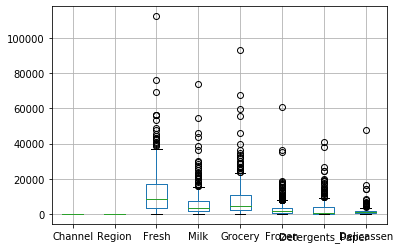

In [64]:
def data_exploration(df):
    
    # this function applies many exploratory techniques to a given dataframe
    
    display("Head", 
            df.head()
           ) 
    
    display("Data Types",
            df.dtypes
            .to_frame()
           ) 
    
    display("Data Types Count",
            df.dtypes
            .to_frame()[0]
            .value_counts()
            .to_frame()
           )
    
    display("Nan Values per Column", 
            df.isna().sum().to_frame().sort_values(by=[0], ascending=False)
           )
    
    display("Descriptive Statistics", 
            df.describe()
           )
    
    display('Outliers',
           df.boxplot()
           )
    
    display("Correlation Matrix", 
            df.corr()
            .style.background_gradient(cmap='coolwarm')
            .set_precision(2)
            )
    display('Skewness',
           df.skew(axis = 0))
    
data_exploration(customers)

In [65]:
# anual expenditure in that type of products
# no missing data -> yeyy
# the types are all int so they are fine
# There are a few features that are very correlated
# I will definetely remove some outliers
# They are positively skewed, which is expectable, the higher the price, less people will buy that product

In [66]:
from matplotlib.ticker import PercentFormatter

# check the pareto principle

# first we need to create a column with the total expenditure per client/row
customers['total'] = customers['Fresh'] + customers['Milk'] + customers['Grocery'] + customers['Frozen'] + customers['Detergents_Paper'] + customers['Delicassen']
# Yes, I know I could automate this process!

# Then we will get the top 20% customers! First we sort by the total columns and then get with the 'head' only the 20% top!
# that is why I do len(customers)*0.2 -> to give me 20%, and because it is ordered, they are the top ones!
top_customers = customers.sort_values('total',ascending=False).head(int(len(customers)*0.2))

# Then we just get the result!
print('The top 20% of customers account for', (top_customers['total'].sum()/customers['total'].sum())*100, '% of total sales')

# Here we can't say that the Pareto law exists because they account for almost 43%, not 80%

The top 20% of customers account for 42.90483942679298 % of total sales


# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [67]:
# first lets remove outliers
from scipy import stats

customers = customers[(np.abs(stats.zscore(customers)) < 3).all(axis=1)]

# I will not drop anything, even though some are very correlated. Depending on the accuracy of the model I will check that!

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [69]:
# Your import here:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
customers_scale = scaler.fit(customers)
customers_scale

StandardScaler(copy=True, with_mean=True, with_std=True)

# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [70]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0).fit(customers) # I guess we need to fit this one and not the customers_scale

customers['labels'] = kmeans.labels_
customers.head()

C:\Users\gonca\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,total,labels
0,2,3,12669,9656,7561,214,2674,1338,34112,0
1,2,3,7057,9810,9568,1762,3293,1776,33266,0
2,2,3,6353,8808,7684,2405,3516,7844,36610,0
3,1,3,13265,1196,4221,6404,507,1788,27381,1
4,2,3,22615,5410,7198,3915,1777,5185,46100,3


Count the values in `labels`.

In [71]:
customers['labels'].value_counts()


4    162
1     93
0     72
3     47
2     40
Name: labels, dtype: int64

# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [72]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.5).fit(customers)

customers['labels_DBSCAN'] = model.labels_
customers.head()

C:\Users\gonca\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,total,labels,labels_DBSCAN
0,2,3,12669,9656,7561,214,2674,1338,34112,0,-1
1,2,3,7057,9810,9568,1762,3293,1776,33266,0,-1
2,2,3,6353,8808,7684,2405,3516,7844,36610,0,-1
3,1,3,13265,1196,4221,6404,507,1788,27381,1,-1
4,2,3,22615,5410,7198,3915,1777,5185,46100,3,-1


Count the values in `labels_DBSCAN`.

In [73]:
customers['labels_DBSCAN'].value_counts()

# Tudo -1?

-1    414
Name: labels_DBSCAN, dtype: int64

# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

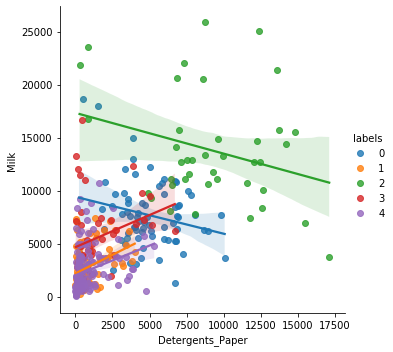

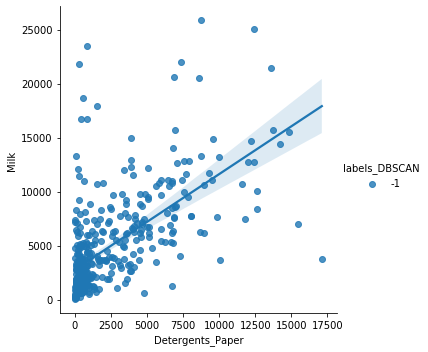

In [79]:
sns.lmplot(data = customers, x='Detergents_Paper', y='Milk', hue='labels')
sns.lmplot(data = customers, x='Detergents_Paper', y='Milk', hue='labels_DBSCAN')
plt.show()


Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

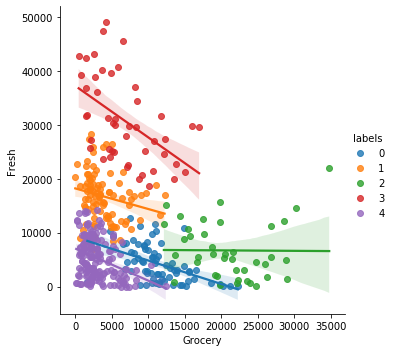

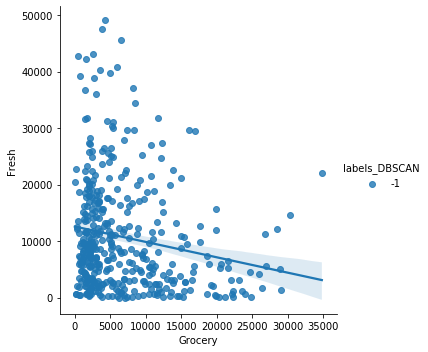

In [80]:
sns.lmplot(data = customers, x='Grocery', y='Fresh', hue='labels')
sns.lmplot(data = customers, x='Grocery', y='Fresh', hue='labels_DBSCAN')
plt.show()


Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

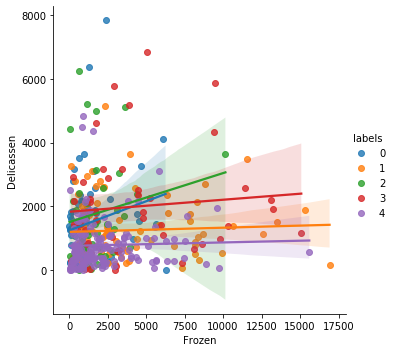

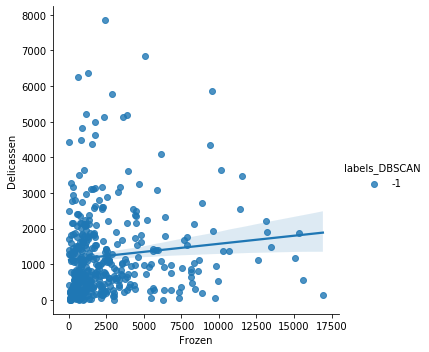

In [81]:
sns.lmplot(data = customers, x='Frozen', y='Delicassen', hue='labels')
sns.lmplot(data = customers, x='Frozen', y='Delicassen', hue='labels_DBSCAN')
plt.show()


Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [89]:
df_means = customers.groupby(by = ['labels'], axis = 0).mean() # this gives me a dataframe with the means of each label


df_means.mean() # this gives me the mean per column

Channel                 1.444435
Region                  2.563054
Fresh               12751.534213
Milk                 6450.151730
Grocery              9218.033958
Frozen               2661.642790
Detergents_Paper     3409.949495
Delicassen           1454.967051
total               35946.279237
labels_DBSCAN          -1.000000
dtype: float64

In [86]:
customers.groupby(by = ['labels_DBSCAN'], axis = 0).mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,total,labels
labels_DBSCAN,,,,,,,,,,
-1,1.31401,2.548309,10711.758454,4871.92029,6814.043478,2549.898551,2373.39372,1237.939614,28558.954106,2.323671


Which algorithm appears to perform better?

In [91]:
from sklearn.metrics import silhouette_score
print("Model 1 Silhouette Score: {}".format(silhouette_score(customers, customers['labels'])))
#print("Model 2 Silhouette Score: {}".format(silhouette_score(customers, customers['labels_DBSCAN'])))

Model 1 Silhouette Score: 0.40301683833441515


# Bonus Challenge 1 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [ ]:
# Your code here

In [ ]:
# Your comment here

# Bonus Challenge 2 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

In [ ]:
# Your comment here